In [4]:
!rm -rf /tmp/Grapevine_Leaves_Image_Dataset

In [5]:
from matplotlib import pyplot as plt
import zipfile

!wget --no-check-certificate \
    "https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip" \
    -O "/tmp/Grapevine_Leaves_Image_Dataset.zip"


zip_ref = zipfile.ZipFile('/tmp/Grapevine_Leaves_Image_Dataset.zip', 'r') 
zip_ref.extractall('/tmp')
zip_ref.close()


--2022-08-05 18:34:00--  https://www.muratkoklu.com/datasets/Grapevine_Leaves_Image_Dataset.zip
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113862245 (109M) [application/zip]
Saving to: ‘/tmp/Grapevine_Leaves_Image_Dataset.zip’

/tmp/Grapevine_Leav 100%[===================>] 108.59M  22.4MB/s    in 5.6s    

2022-08-05 18:34:06 (19.3 MB/s) - ‘/tmp/Grapevine_Leaves_Image_Dataset.zip’ saved [113862245/113862245]



In [76]:
import numpy as np
import shutil
import os
rootdir = '/tmp/Grapevine_Leaves_Image_Dataset'
classes = ['Ak', 'Ala_Idris','Buzgulu','Dimnit','Nazli']

test_ratio = 0.20
for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)

  test_ratio = 0.2

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i) 

In [77]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import shutil
import os

for i in classes:  
  for file_address in train_FileNames:
    datagen = ImageDataGenerator(
          rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
    
    img = load_img(file_address)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    save_dir =  rootdir +'/train/' + i

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    j = 0
    for batch in datagen.flow(x, batch_size=1,
                            save_to_dir=save_dir, save_format='png'):
        j += 1
        if (j > 3) :
            break 
  shutil.copy(file_address, rootdir +'/train/' + i)
  print (os.listdir( rootdir +'/train/' + i ))

['_0_2366.png', 'Ak (10).png', '_0_761.png', '_0_7395.png', '_0_2630.png', '_0_2953.png', '_0_2457.png', '_0_6056.png', '_0_4237.png', 'Ak (6).png', '_0_9537.png', '_0_1448.png', '_0_1340.png', '_0_9932.png', '_0_3678.png', 'Ak (42).png', '_0_1384.png', '_0_7642.png', '_0_1331.png', '_0_320.png', '_0_2257.png', '_0_2240.png', 'Ak (35).png', '_0_1174.png', '_0_2718.png', '_0_9035.png', '_0_4042.png', '_0_5052.png', '_0_6113.png', '_0_229.png', '_0_9783.png', '_0_7126.png', '_0_1699.png', '_0_7040.png', 'Ak (67).png', 'Ak (31).png', '_0_463.png', '_0_7416.png', '_0_8645.png', '_0_2910.png', '_0_1839.png', '_0_8320.png', '_0_9148.png', '_0_2842.png', '_0_76.png', '_0_8568.png', '_0_2436.png', '_0_987.png', '_0_3685.png', '_0_2975.png', '_0_7727.png', '_0_2063.png', '_0_182.png', 'Ak (91).png', '_0_6748.png', 'Ak (14).png', '_0_1836.png', '_0_9718.png', '_0_5285.png', '_0_396.png', '_0_7213.png', '_0_8878.png', 'Ak (70).png', '_0_5206.png', 'Ak (73).png', '_0_9110.png', '_0_1237.png', '_0_

In [78]:
import numpy as np
import shutil
rootdir = '/tmp/Grapevine_Leaves_Image_Dataset/train'
classes = ['Ak','Ala_Idris','Buzgulu','Dimnit','Nazli']

validation_ratio = 0.20
for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/validation/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)

  validation_ratio = 0.2

  train_, validation_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - validation_ratio))])

  train_ = [source+'/'+ name for name in train_.tolist()]
  validation_FileNames = [source+'/' + name for name in validation_FileNames.tolist()]

  for name in train_:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in validation_FileNames:
    shutil.copy(name, rootdir +'/validation/' + i)

In [84]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
#additing the 1st convolution layers
tf.keras.layers.Conv2D(16,(3,3) ,activation='relu',input_shape=(150,150,3)), 
tf.keras.layers.MaxPool2D(2,2),   
#addition the 2nd convolution layers
tf.keras.layers.Conv2D(32,(3,3) , activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
#addition the 3rd convolution layers
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid'),                               
# YOUR CODE HERE
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [80]:
rootdir = '/tmp/Grapevine_Leaves_Image_Dataset'
TRAINING_DIR = rootdir +'/train/train'
train_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALID_DIR = rootdir +'/train/validation'
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
valid_generator = train_datagen.flow_from_directory(VALID_DIR ,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
TEST_DIR = rootdir +'/test'
test_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
test_generator = train_datagen.flow_from_directory(TEST_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 1578 images belonging to 5 classes.
Found 396 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [81]:
import warnings
warnings.filterwarnings('ignore')
print('warnings ignored')

warnings ignored


In [83]:
history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=valid_generator)

Epoch 1/5
79/79 [==============================] - 48s 609ms/step - loss: 1.6111 - accuracy: 0.6270 - val_loss: 1.6097 - val_accuracy: 0.6808
Epoch 2/5
79/79 [==============================] - 47s 598ms/step - loss: 1.6105 - accuracy: 0.5606 - val_loss: 1.6102 - val_accuracy: 0.5601
Epoch 3/5
79/79 [==============================] - 47s 599ms/step - loss: 1.6064 - accuracy: 0.4292 - val_loss: 1.6089 - val_accuracy: 0.3985
Epoch 4/5
79/79 [==============================] - 48s 600ms/step - loss: 1.5323 - accuracy: 0.4632 - val_loss: 1.6822 - val_accuracy: 0.3707
Epoch 5/5
79/79 [==============================] - 47s 597ms/step - loss: 1.2927 - accuracy: 0.4829 - val_loss: 2.0392 - val_accuracy: 0.4035


Text(0.5, 1.0, 'Training and validation loss')

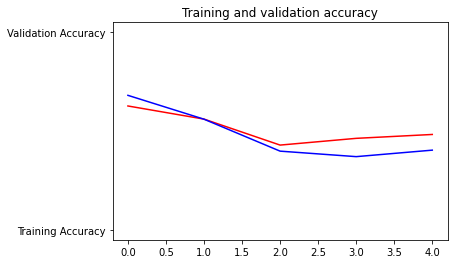

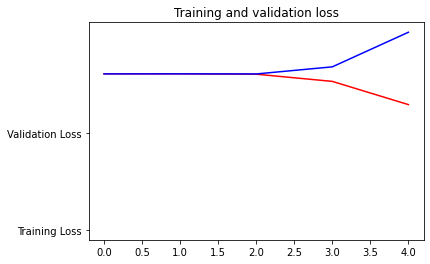

In [85]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

Pretrained model 

In [86]:
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense,Dropout
from keras.backend import pool2d
from keras.layers.pooling import GlobalAveragePooling2D

In [87]:
base_model1 = VGG16(input_shape = (128, 128, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [88]:
model1=base_model1.output

model1=Dense(512, activation='relu')(model1)
model1= GlobalAveragePooling2D()(model1)
model1=Dropout(rate=0.5)(model1)
model1=Dense(2, activation='softmax')(model1)
model1=Model(inputs=base_model1.inputs, outputs=model1)

In [89]:
base_model1.trainable=False

In [90]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [92]:
rootdir = '/tmp/Grapevine_Leaves_Image_Dataset'
TRAINING_DIR = rootdir +'/train/train'
train_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALID_DIR = rootdir +'/train/validation'
valid_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
valid_generator = train_datagen.flow_from_directory(VALID_DIR ,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
TEST_DIR = rootdir +'/test'
test_datagen = ImageDataGenerator( rescale = 1.0/255. )#YOUR CODE HERE
test_generator = train_datagen.flow_from_directory(TEST_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 1578 images belonging to 5 classes.
Found 396 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [93]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [94]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [96]:
history1 = model1.fit(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=valid_generator)

Epoch 1/3


InvalidArgumentError: ignored

random seed

In [97]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
for layer in inception.layers[:-15]:
    layer.trainable = False

inception_model = Sequential([inception,
        GlobalAveragePooling2D(),
        Flatten(),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(5, activation='softmax')])
inception_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 dropout_4 (Dropout)         (None, 128)               

In [98]:
inception_model.compile(optimizer= 'adam', loss="categorical_crossentropy", metrics=["accuracy"])
inception_history = inception_model.fit(train_generator, steps_per_epoch = 8, validation_data = valid_generator, validation_steps = 2, epochs = 25)

Epoch 1/25
8/8 [==============================] - 41s 1s/step - loss: 2.0664 - accuracy: 0.2500 - val_loss: 2.1817 - val_accuracy: 0.1000
Epoch 2/25
8/8 [==============================] - 8s 995ms/step - loss: 1.8392 - accuracy: 0.2500 - val_loss: 1.8799 - val_accuracy: 0.2000
Epoch 3/25
8/8 [==============================] - 8s 1s/step - loss: 1.8226 - accuracy: 0.2342 - val_loss: 1.9909 - val_accuracy: 0.1000
Epoch 4/25
8/8 [==============================] - 8s 1s/step - loss: 1.6755 - accuracy: 0.2062 - val_loss: 1.7704 - val_accuracy: 0.1000
Epoch 5/25
8/8 [==============================] - 8s 1s/step - loss: 1.6194 - accuracy: 0.2438 - val_loss: 1.5738 - val_accuracy: 0.2500
Epoch 6/25
8/8 [==============================] - 8s 1s/step - loss: 1.5853 - accuracy: 0.2750 - val_loss: 1.6084 - val_accuracy: 0.2500
Epoch 7/25
8/8 [==============================] - 8s 1s/step - loss: 1.6223 - accuracy: 0.1813 - val_loss: 1.6732 - val_accuracy: 0.1000
Epoch 8/25
8/8 [=====================

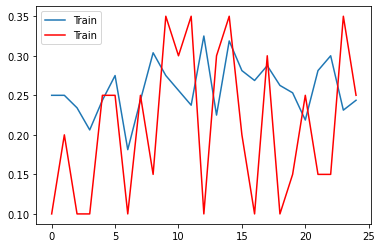

In [99]:
plt.plot(inception_history.history['accuracy'], label='Train')
plt.plot(inception_history.history['val_accuracy'], 'r', label='Train')
plt.legend()

In [100]:
y_train = train_generator.classes
y_test = test_generator.classes
y_train_pred = inception_model.predict(train_generator)
y_test_pred = inception_model.predict(test_generator)

In [103]:
y_pred = []
for i in range(len(y_test_pred)):
  y_pred.append(argmax(y_test_pred[i]))

In [104]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = metrics.confusion_matrix(y_test, y_pred)

Found 1578 images belonging to 5 classes.
Found 396 images belonging to 5 classes.
Epoch 1/10
8/8 [==============================] - 16s 1s/step - loss: 1.5180 - accuracy: 0.3562 - val_loss: 1.9565 - val_accuracy: 0.4000
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 1.5577 - accuracy: 0.3125 - val_loss: 1.6190 - val_accuracy: 0.2000
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 1.4789 - accuracy: 0.3250 - val_loss: 1.5789 - val_accuracy: 0.4000
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 1.4579 - accuracy: 0.3625 - val_loss: 1.5573 - val_accuracy: 0.3500
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 1.4519 - accuracy: 0.3375 - val_loss: 1.3166 - val_accuracy: 0.3500
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 1.4087 - accuracy: 0.4062 - val_loss: 1.3592 - val_accuracy: 0.3500
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 1.4476 - accuracy: 0.3

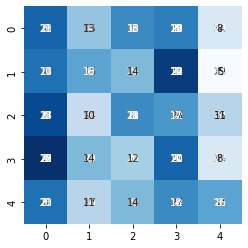

In [106]:
import random
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from numpy import argmax
from sklearn.metrics import confusion_matrix

avg_acc = []
avg_acc_val = []
for i in range(10):
  a = random.randint(1,200)
  train_generator1 = train_datagen.flow_from_directory(
     TRAINING_DIR,batch_size=32,class_mode='categorical', target_size=(300, 300),subset='training', shuffle=True, seed=a)

  validation_generator1 = valid_datagen.flow_from_directory(
     VALID_DIR, target_size=(300, 300), batch_size=8, shuffle=False)
  inception_model.compile(optimizer= 'adam', loss="categorical_crossentropy", metrics=["accuracy"])
  inception_history = inception_model.fit(train_generator, steps_per_epoch = 8, validation_data = valid_generator, validation_steps = 2, epochs = 10)
  avg_acc.append(sum(inception_history.history['accuracy'])/10)
  avg_acc_val.append(sum(inception_history.history['val_accuracy'])/10)

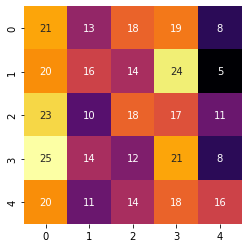

In [107]:
y_pred = argmax(y_test_pred)
y_pred = []
for i in range(len(y_test_pred)):
  y_pred.append(argmax(y_test_pred[i]))
sns.heatmap(conf_mat, square=True, annot=True, cmap='inferno', fmt='d', cbar=False)

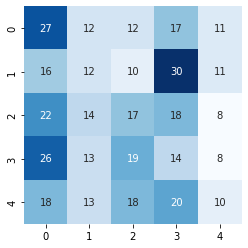

In [108]:
y_train = train_generator.classes
y_test = valid_generator.classes
y_train_pred = inception_model.predict(train_generator)
y_test_pred = inception_model.predict(valid_generator)
y_pred1 = []
for i in range(len(y_test_pred)):
  y_pred1.append(argmax(y_test_pred[i]))
conf_mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

auto encoder

In [6]:
import glob
path = '/tmp/Grapevine_Leaves_Image_Dataset/'
files = [f for f in glob.glob(path + "*/*.png", recursive=True)]

In [8]:
import os
label_map = {'Ak':0,
             'Ala_Idris':1,
             'Buzgulu':2,
             'Dimnit':3,
             'Nazli':4,}
label = [label_map[os.path.basename(file).split(' ')[0]] for file in files]
print(label)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [9]:
import numpy as np

X_train = []
Y_train = []
X_test  = []
Y_test  = []
X_validation  = []
Y_validation  = []
for i in classes:
  for file_address in train_:
      X_train.append(file_address)
      Y_train.append(label_map[i])
  for file_address in test_FileNames:
      X_test.append(file_address)
      Y_test.append(label_map[i])
  for file_address in validation_FileNames:
      X_validation.append(file_address)
      Y_validation.append(label_map[i])

X_train =  np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(Y_test)
Y_test  = np.array(Y_test)
X_validation = np.array(X_validation)

NameError: ignored

In [112]:
from numpy import asarray
from PIL import Image

images = []
for path in files:
  # print("path: ", path)
  image = Image.open(path)
  # print(image)
  resized_img = image.resize((180, 180))
  numpydata = asarray(resized_img)
  images.append(numpydata)
  # print(numpydata)
# image = Image.open(files[0])

print(type(images[0]))
print(images[0].shape)
print(images[0])
# print(np.array(images)/255.)
images = np.array(images)
images_np_scaled = images.astype('float32')/255.
images_np_scaled = np.delete(images_np_scaled, 3, 3)
print(images_np_scaled)
print(type(images_np_scaled))

<class 'numpy.ndarray'>
(180, 180, 4)
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[

In [113]:
np.random.shuffle(images_np_scaled)
X = files[:400]
print(files[0])
X_TRAIN, X_TEST = images_np_scaled[:400,:], images_np_scaled[400:,:]
Y_TRAIN = []
Y_TEST  = []
for i in range(400):
  img = files[i]
  if (img.find('Ak') != -1):
    Y_TRAIN.append(0)
  elif (img.find('Ala_Idris') != -1):
    Y_TRAIN.append(1)
  elif (img.find('Buzgulu') != -1):
    Y_TRAIN.append(2)
  elif (img.find('Dimnit') != -1):
    Y_TRAIN.append(3)
  elif (img.find('Nazli') != -1):
        Y_TRAIN.append(4)


for i in range(100):
  img = files[i]
  if (img.find('Ak') != -1):
    Y_TEST.append(0)
  elif (img.find('Ala_Idris') != -1):
    Y_TEST.append(1)
  elif (img.find('Buzgulu') != -1):
    Y_TEST.append(2)
  elif (img.find('Dimnit') != -1):
    Y_TEST.append(3)
  elif (img.find('Nazli') != -1):
        Y_TEST.append(4)

Y_TRAIN = np.array(Y_TRAIN)
Y_TEST  = np.array(Y_TEST)

X_TRAIN = X_TRAIN.astype('float32')
print ('-----:    ' , X_TEST.shape )
X_TEST  = X_TEST.astype('float32')
print ('-----:    ' , X_TEST.shape )
# print(type(X_TRAIN[0]))
# print(Y_TRAIN.shape)

/tmp/Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (37).png
-----:     (100, 180, 180, 3)
-----:     (100, 180, 180, 3)


In [114]:
    # to convert values from 0 to 255 into range 0 to 1.
os.environ['KMP_DUPLICATE_LIB_OK']='True'

noise_factor = 0.5
    
    #np.random.normal => random means to obtain random samples
    #normal means normal or gaussian distribution, 
    #i.e. random sample from gaussian distribution
train_X_noisy = X_TRAIN + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_TRAIN.shape)  
test_X_noisy = X_TEST + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_TEST.shape) 
    
    # to make values in the range of 0 to 1, 
    #if values < 0 then they will be equal to 0 and 
    #if values > 1 then they will be equal to 1.
train_X_noisy = np.clip(train_X_noisy, 0., 1.)   
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

In [115]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

Input_img = Input(shape=(180, 180, 3))  
    
#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
x1 = MaxPool2D( (2, 2), padding='same')(x1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2), padding='same')(x2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x2)
encoded    = MaxPool2D( (2, 2), padding='same')(x3)
    
# decoding architecture
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x2 = UpSampling2D((2, 2))(x2)
x1 = Conv2D(64, (3, 3), activation='relu')(x2)
x1 = UpSampling2D((2, 2))(x1)
decoded   = Conv2D(1, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_100 (Conv2D)         (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 90, 90, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 45, 45, 16)        4624

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [1]:
from keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

autoencoder.fit(train_X_noisy, X_TRAIN,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(test_X_noisy, X_TEST),
                callbacks=[early_stopper])

NameError: ignored

In [118]:
predictions = autoencoder.predict(test_X_noisy)

Test Images


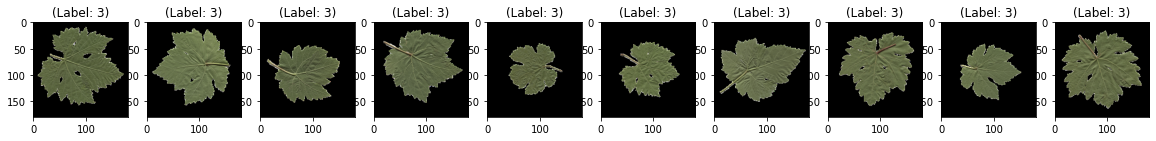

Test Images with Noise


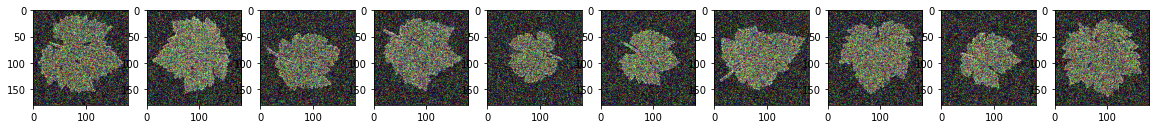

Reconstruction of Noisy Test Images


TypeError: ignored

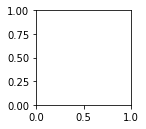

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_TEST[i,:,:], cmap='gray')
    curr_lbl = Y_TEST[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_X_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1) 
    plt.imshow(predictions[i,:,:], cmap='gray') 
plt.show()


In [124]:
def plot_loss(history, x = 'loss', y = 'val_loss'): 
 fig, ax = plt.subplots( figsize=(20,10)) 
 ax.plot(history.history[x]) 
 ax.plot(history.history[y]) 
 plt.title('Model Loss') 
 plt.ylabel(y) 
 plt.xlabel(x) 
 plt.legend(['Train', 'Val'], loc='upper left') 
 ax.grid(color='black') 
 plt.show()

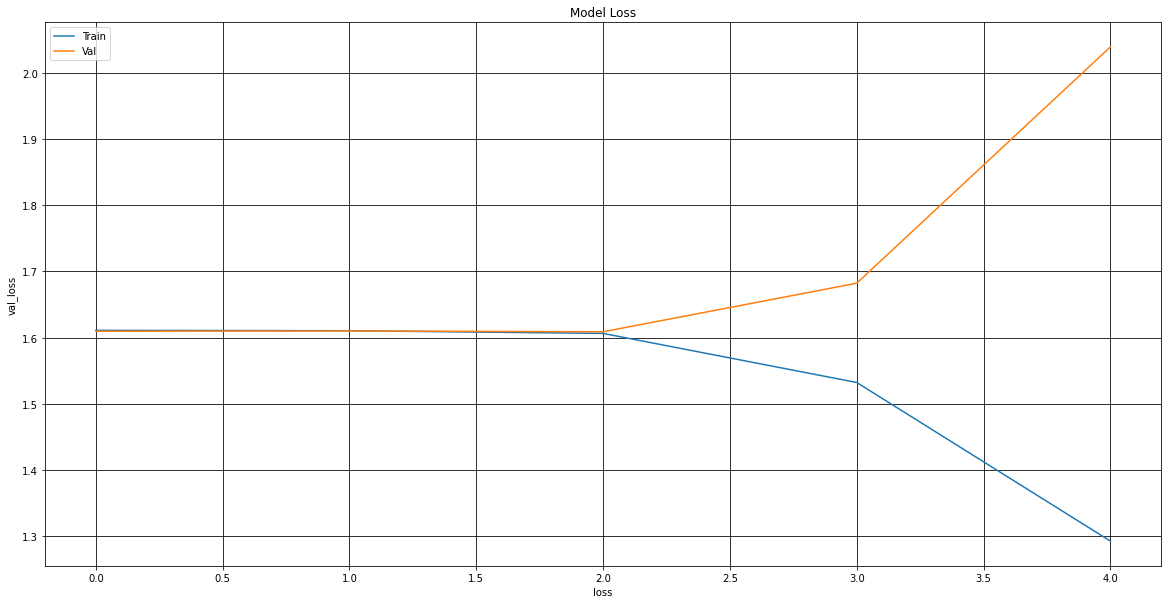

In [125]:
plot_loss(history) 

In [109]:
X_train = []
Y_train = []
for i in classes:
  for file_address in train_FileNames:
      X_train.append (file_address)
      Y_train.append (label_map[i])

X_train =  np.array(X_train)
Y_train = np.array(Y_train)

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Pipeline

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

# Pass instance of pipeline and training and test data set
# cv=10 represents the StratifiedKFold with 10 folds

scores = cross_val_score(pipeline, X=X_train, y=Y_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))


Cross Validation accuracy scores: [nan nan nan nan nan nan nan nan nan nan]
Cross Validation accuracy: nan +/- nan


In [ ]:
#!rm -rf /tmp/Grapevine_Leaves_Image_Dataset/train